### ENGR 1330 – Computational Thinking and Data Science

# HVAC Energy Predictor Final Project Model Construction:

Before you begin, read the description of the dataset here: https://archive.ics.uci.edu/dataset/242/energy+efficiency

**Literature Scan** 

Minimizing heating and cooling loads in residential systems is challenging because there are many things that need to be done before effectively working on the issue. Firstly, researchers must identify the several variables that affect the heating and cooling loads. For example, they must identify if glazing area has an effect consider whether the house's overall height (height from foundation to chimney) truly matters. Then, they cannot simply independently evaluate each variable's effect on the heating and cooling load; they must see how the variable influence the loads when put together. Finally, when a reasonable conclusion is reached about all of the variables put together, they can begin to tackle the issue in residential systems to decrease heating and cooling loads. 
Therefore, a data model is extremely valuable in the context of the conventional approach to HVAC energy prediction. Instead of the conventional approach of separating the variables and brute-forcing our way to find a solution, we can look at the data's effect in terms of all variables and the relative effect each variable has on the loads.

**Exploratory Data Analysis**

The provided database seeks to link heating and cooling loads with eight variables suspected to have some impact on the loads. The data is dispersed over 768 different combinations of values of these variables. The variables follow:

- X1: Relative Compactness: RC
- X2: Surface Area: SA
- X3: Wall Area: WA
- X4: Roof Area: RA
- X5: Overall Height:OH
- X6: Orientation: O
- X7: Glazing Area: GA
- X8: Glazing Area Distribution: GAD
- y1: Heating Load: HL
- y2: Cooling Load: CL



In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Analyzing Dataframe

In [376]:
enb=pd.read_csv("ENB2012data.csv") 

In [377]:
enb.dropna(axis=1,inplace=True) #dropping a null column from the dataframe

In [378]:
enb.rename(columns={"X1":"RC"}, inplace=True)
enb.rename(columns={"X2":"SA"}, inplace=True)
enb.rename(columns={"X3":"WA"}, inplace=True)
enb.rename(columns={"X4":"RA"}, inplace=True)
enb.rename(columns={"X5":"OH"}, inplace=True)
enb.rename(columns={"X6":"O"}, inplace=True)
enb.rename(columns={"X7":"GA"}, inplace=True)
enb.rename(columns={"X8":"GAD"}, inplace=True)
enb.rename(columns={"Y1":"HL"}, inplace=True)
enb.rename(columns={"Y2":"CL"}, inplace=True)
enb #renaming columns
#please see Exploratory Data Analysis for column name keys if needed


,RC,SA,WA,RA,OH,O,GA,GAD,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
760,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
761,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
762,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
763,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


C:\Users\rahaw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


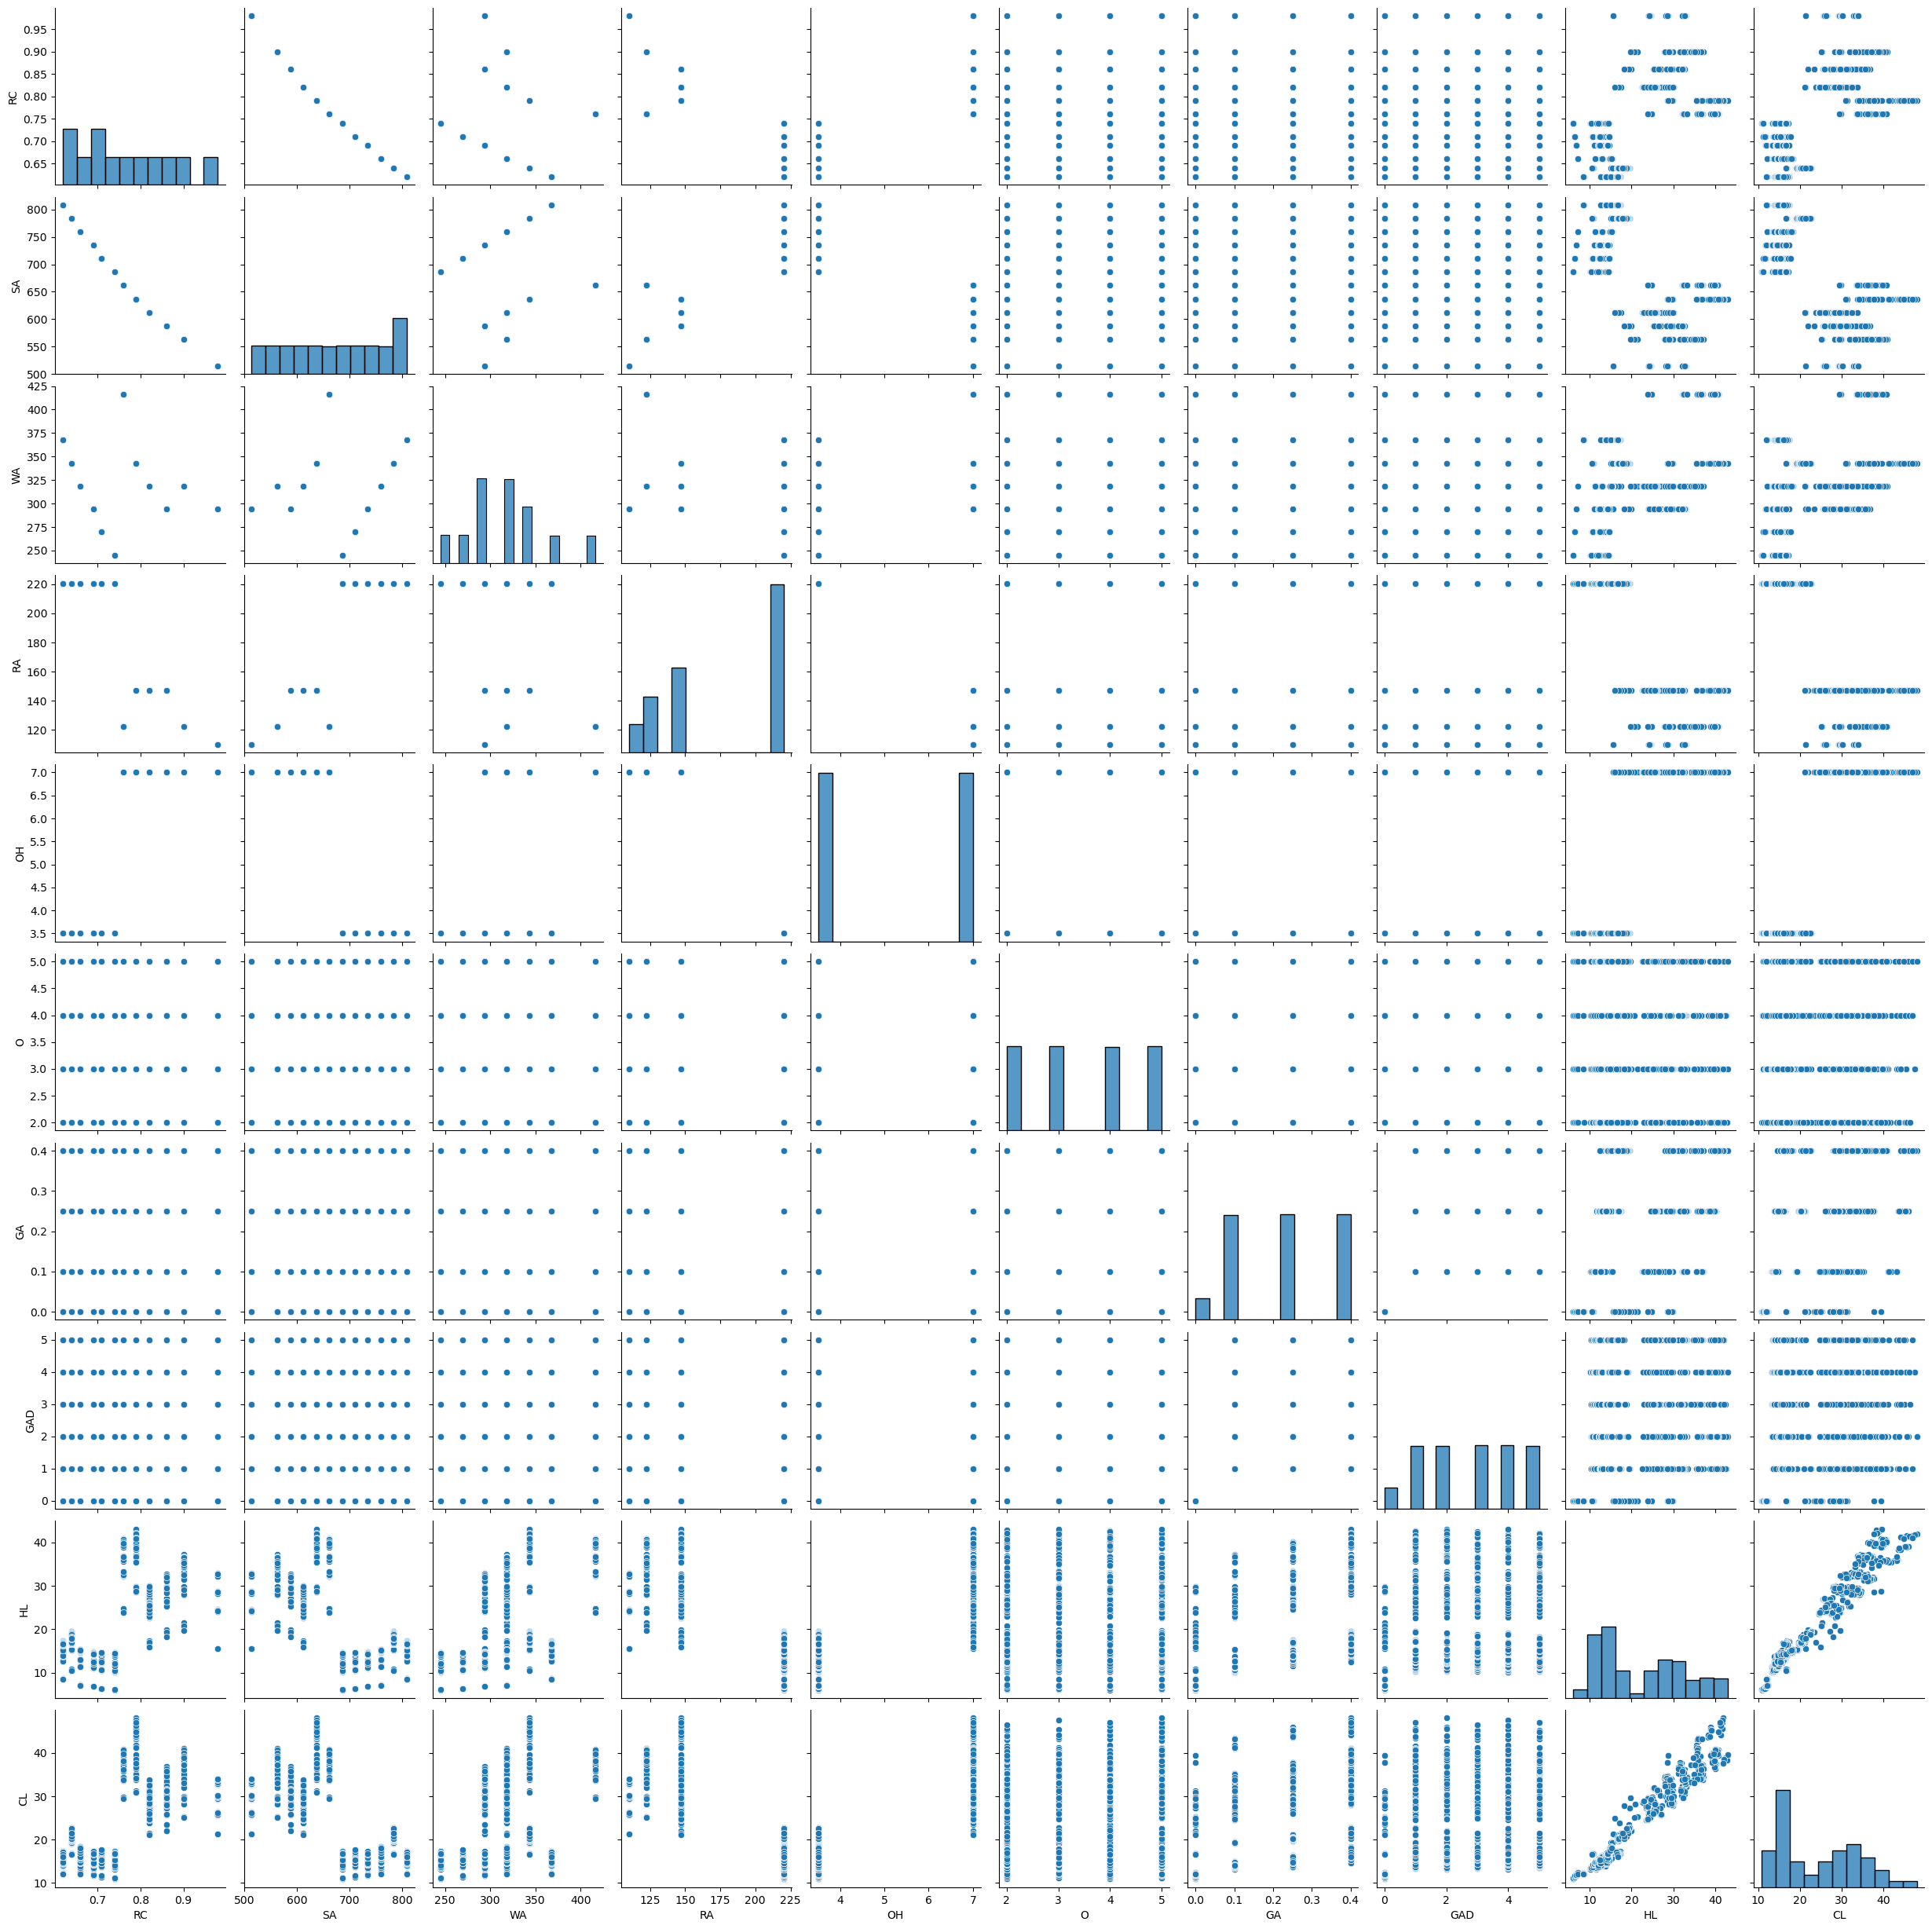

In [379]:
sns.pairplot(enb)

Based on the pairplots, our first model will include the variables Relative Compactness, Surface Area, and Glazing Area. 

# First Model

## Heating Load

### Train-Test Split

In [380]:
#Begin Train-Test-Split Procedure (for predicting HL)
#no outlying outliers
x1=enb.copy()
x1=x1.iloc[:,[0,1,6]]
heat_y=enb.loc[:,"HL"]

In [381]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,heat_y,test_size=.3)

### Linear Model

In [382]:
#try linear model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
print(linear.coef_,linear.intercept_)

y_pred=linear.predict(x_train)
x_train["HL"]=heat_y
x_train["Pred HL"]=y_pred

[-193.4152697    -0.30584003   20.21826244] 371.04231051289366


Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

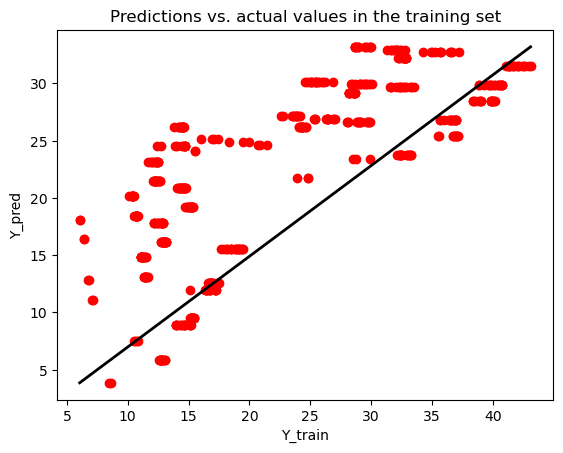

In [383]:
plt.scatter(y_train,y_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_pred.min(), y_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

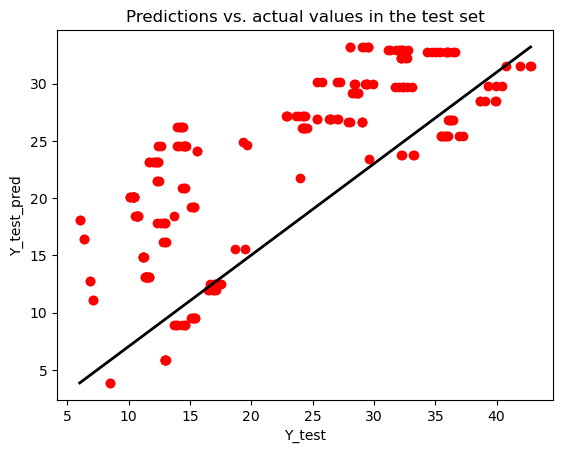

In [384]:
y_test_pred = linear.predict(x_test)
x_test["HL"]=y_test
x_test["Pred HL"]=y_test_pred

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

#off of the graph, it looks like a quadratic function would fit better

In [385]:
from sklearn import metrics

MSE_train = metrics.mean_squared_error(y_train, y_pred)
RMSE_train = np.sqrt(MSE_train)   
                                       
RMSE_train

6.653148771818425

In [386]:
MSE_test = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)  

RMSE_test

6.697404315280464

### Polynomial Model

In [387]:
x_train,x_test,y_train,y_test=train_test_split(x1,heat_y,test_size=.3)

In [388]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
xp_poly = poly.fit_transform(x_train)

model=LinearRegression()
model.fit(xp_poly,y_train)


LinearRegression()

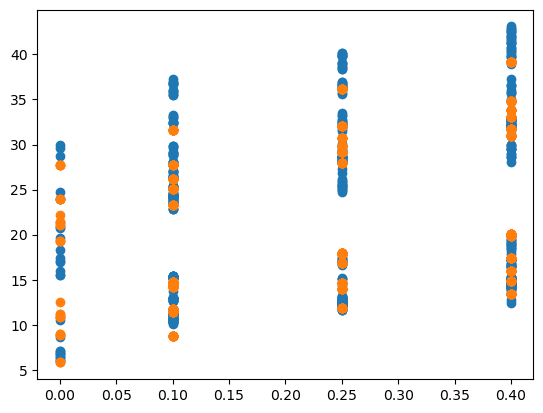

In [389]:
yp_pred=model.predict(xp_poly)
plt.scatter(x_train["GA"],y_train)
plt.scatter(x_train["GA"],yp_pred)


In [390]:
pMSE=metrics.mean_squared_error(y_train,yp_pred)
pRMSE=np.sqrt(pMSE)
pRMSE

5.1257833293201385

In [391]:
poly1=PolynomialFeatures(degree=2)
xp_polytest = poly1.fit_transform(x_test)

model=LinearRegression()
model.fit(xp_polytest,y_test)

LinearRegression()

In [392]:
ypt_pred=model.predict(xp_polytest)

In [393]:
ptMSE=metrics.mean_squared_error(y_test,ypt_pred)
ptRMSE=np.sqrt(ptMSE)
ptRMSE

4.900616853704109

We tried the polynomial regression line with degrees 2, 3, 4, and 5. We ended up picking degree 4 because that is where 1) the RMSE was minimized and 2) the train/test errors were mostly consistent with each other. For degrees 2 and 3, the RMSE was a too large (although train/test errors were consistent) whereas for degrees 5 and beyond, RMSE and train/test error consistency were both diminished. This is likely due to an overfitting of the model.

## Cooling Load

### Polynomial Model

In [394]:
cool_y=enb.loc[:,"CL"]

In [395]:
x_train,x_test,y_train,y_test=train_test_split(x1,cool_y,test_size=.3)

In [396]:
poly2=PolynomialFeatures(degree=2)
xp_poly2 = poly2.fit_transform(x_train)

model=LinearRegression()
model.fit(xp_poly2,y_train)


LinearRegression()

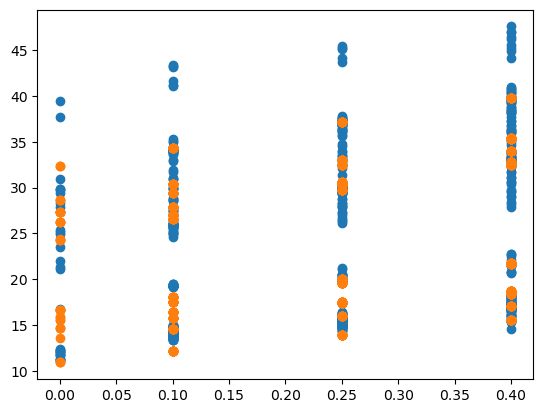

In [397]:
yp_pred2=model.predict(xp_poly2)
plt.scatter(x_train["GA"],y_train)
plt.scatter(x_train["GA"],yp_pred2)


In [398]:
pMSE=metrics.mean_squared_error(y_train,yp_pred2)
pRMSE=np.sqrt(pMSE)
pRMSE

5.019845733536653

In [399]:
poly3=PolynomialFeatures(degree=2)
xp_poly3 = poly3.fit_transform(x_test)

model=LinearRegression()
model.fit(xp_poly3,y_test)

LinearRegression()

In [400]:
ypt_pred=model.predict(xp_poly3)

In [401]:
ptMSE=metrics.mean_squared_error(y_test,ypt_pred)
ptRMSE=np.sqrt(ptMSE)
ptRMSE

4.928653515388776

In [402]:
#team, i think we use model.coef_ function (look at Polynomial 
#Regression notes); after performing the functions for the 
#model under one function, we need to take the coefficients 
#in the array 
#and plug them into the quadratic equation that will then 
#predict the hl and cl (it will be more 
#than 10 terms if we use degree 4 for the regression line, 
#but that will make it more accurate), if we want to change
#it back to degree 4,keep in mind there are 2 places per 
#heating/cooling load per model that we have to change
#degree from 2 to 4.

#we will need 2 equations for the model we choose (HL, CL) 

#heres what im talking about coeffecients, don't forget to add +1 
#to the end of equation
model=LinearRegression()
model.fit(xp_poly2,y_train)
a=model.coef_
a

array([ 0.00000000e+00, -1.89350326e+04, -2.62955619e+01,  5.99956611e+01,
        5.50871167e+03,  1.44316858e+01, -2.94777378e+00,  1.05944613e-02,
       -6.09353684e-02, -4.28014255e+00])

# Second Model 

For this model, will observe the error of model that observes six variables: Relative Compactness, Surface Area, Glazing Area, Overall Height, Wall Area, and Roof Area. We wonder whether drastically increasing the number of variables and being open to possible (perhaps not obvious) effects will help or hurt our model.

In [403]:
#team, having more variables also makes the equation have more terms

## Heating Load

### Polynomial Model

In [404]:
x2=enb.copy()
x2=x2.iloc[:,[0,1,2,3,4,6]]

In [405]:
x_train,x_test,y_train,y_test=train_test_split(x2,heat_y,test_size=.3)

In [406]:
poly4=PolynomialFeatures(degree=2)
xp_poly4 = poly4.fit_transform(x_train)

model=LinearRegression()
model.fit(xp_poly4,y_train)

LinearRegression()

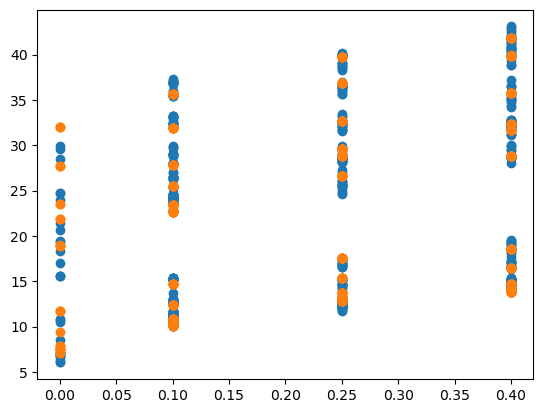

In [407]:
yp_pred4=model.predict(xp_poly4)
plt.scatter(x_train["GA"],y_train)
plt.scatter(x_train["GA"],yp_pred4)

In [408]:
pMSE=metrics.mean_squared_error(y_train,yp_pred4)
pRMSE=np.sqrt(pMSE)
pRMSE

0.8836880363676158

In [409]:
poly5=PolynomialFeatures(degree=2)
xp_poly5 = poly5.fit_transform(x_test)

model=LinearRegression()
model.fit(xp_poly5,y_test)

LinearRegression()

In [410]:
ypt_pred=model.predict(xp_poly5)

In [411]:
ptMSE=metrics.mean_squared_error(y_test,ypt_pred)
ptRMSE=np.sqrt(ptMSE)
ptRMSE

0.8666464307154312

## Cooling Model

In [412]:
x_train,x_test,y_train,y_test=train_test_split(x2,cool_y,test_size=.3)

In [413]:
poly6=PolynomialFeatures(degree=2)
xp_poly6 = poly6.fit_transform(x_train)

model=LinearRegression()
model.fit(xp_poly6,y_train)

LinearRegression()

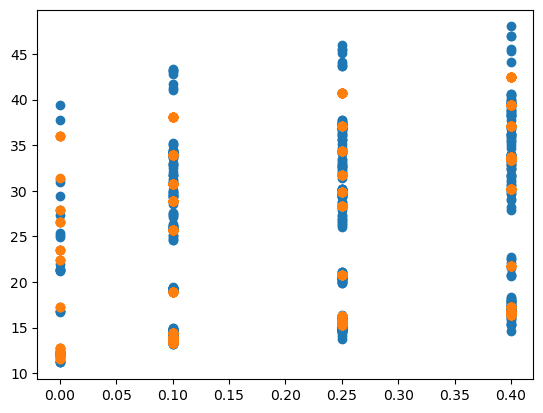

In [414]:
yp_pred6=model.predict(xp_poly6)
plt.scatter(x_train["GA"],y_train)
plt.scatter(x_train["GA"],yp_pred6)

In [415]:
pMSE=metrics.mean_squared_error(y_train,yp_pred6)
pRMSE=np.sqrt(pMSE)
pRMSE

1.6822331846489644

In [416]:
poly7=PolynomialFeatures(degree=2)
xp_poly7 = poly7.fit_transform(x_test)

model=LinearRegression()
model.fit(xp_poly7,y_test)

LinearRegression()

In [417]:
ypt_pred=model.predict(xp_poly7)

In [418]:
ptMSE=metrics.mean_squared_error(y_test,ypt_pred)
ptRMSE=np.sqrt(ptMSE)
ptRMSE

1.473369038355956